##### Evaluation Project - 3

# Avocado Project

##### Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

#### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [1]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the datafiles and loading the datasets,trying to understand the data.

df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# Dropping the 'Unnamed: 0' column, no used of this column in dataset

df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
# knowing the shape of the datasets
df.shape

(18249, 13)

They are 18249 rows and 13 columns is their in the dataset

In [5]:
#finding the datatypes of each of the columns.
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

#### Key observation:
- 1 integer, 9 float and 3 object variable present in dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


from this method we can see the type of data we are having in our dataset as per requirement we need to treat them

In [7]:
# Checking any null value present in dataset

df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values are present in the dataset.

## Exploratory Data Analysis (EDA)

#### Summary Statistics

In [8]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### Key Observation:

Uisng the describe method we are able to see information about numerical columns since object data types are ignored in this function. The count columns again confirms of our dataset having no missing values.

We do have zero values present in columns 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags but they seem to be valid since there is a possibility of presence of a legitimate zero value.

#### Data Visualization

To check missing values

<AxesSubplot:>

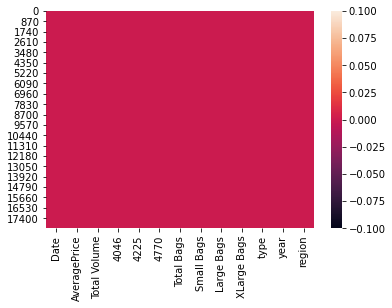

In [9]:
sns.heatmap(df.isnull())

Using Visualizing data plot to re-check null value and heatmap plot is showing their is no null value present in the dataset

In [10]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [11]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

As we can see that some of columns are highly skewed let us proceed with it later we will treat as per requirement

In [12]:
df['Year'],df['month'],df['day']=df['Date'].str.split('-').str

We have split column 'Date' into three new column namely Year,month,day.

In [13]:
df['Year']=df['Year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)

In [14]:
df.drop(['year','Date'],axis=1,inplace=True)

In [15]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [16]:
df.shape

(18249, 14)

### To check Correlation

In [17]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,month,day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
Year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

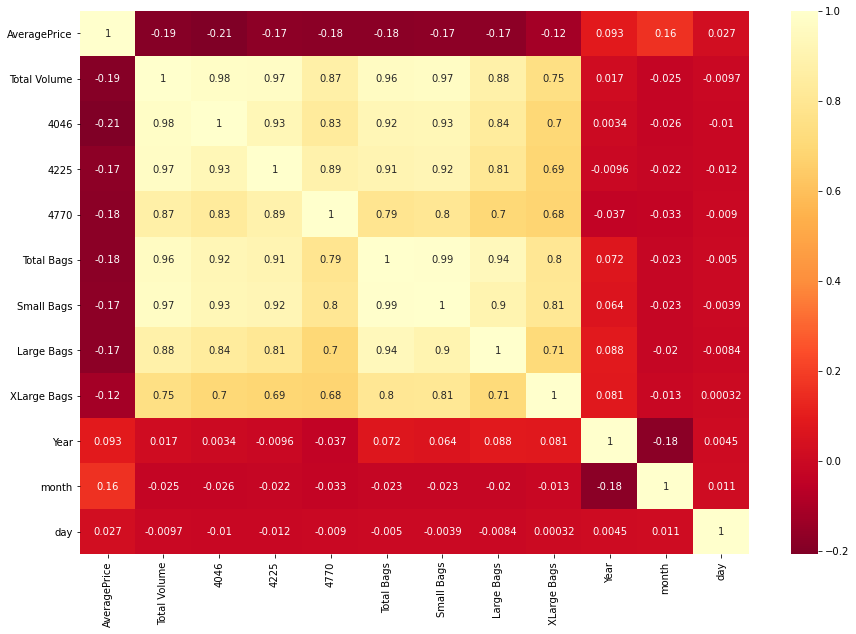

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

#### Key observation :
- All columns are negative correlated with Average Price(target class).

### Plotting outliers

In [19]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'month', 'day'],
      dtype='object')

#### Univariate analysis

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

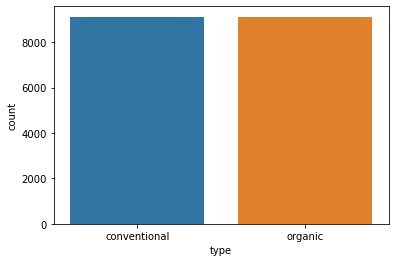

In [20]:
print(df['type'].value_counts())
sns.countplot(df['type'])

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='count'>

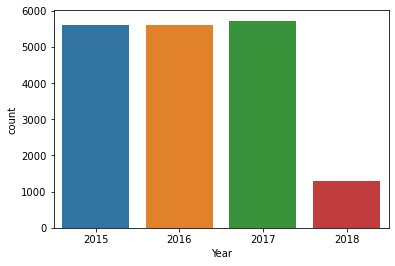

In [21]:
print(df['Year'].value_counts())
sns.countplot(df['Year'])

1     1944
3     1836
2     1728
5     1512
7     1512
10    1512
4     1404
8     1404
11    1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

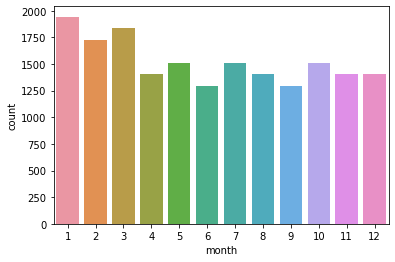

In [22]:
print(df['month'].value_counts())
sns.countplot(df['month'])

11    756
4     756
18    755
25    755
8     648
12    648
24    648
1     648
26    648
22    648
5     648
19    648
3     648
15    648
17    648
10    648
27    540
28    540
7     540
14    540
29    540
21    540
20    540
13    540
6     539
30    432
16    432
9     432
23    432
2     432
31    432
Name: day, dtype: int64


<AxesSubplot:xlabel='day', ylabel='count'>

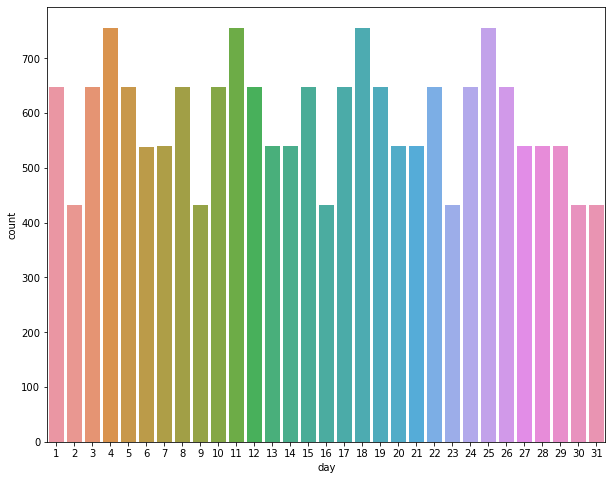

In [23]:
print(df['day'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(df['day'])

Pittsburgh             338
SanDiego               338
Plains                 338
StLouis                338
SouthCarolina          338
MiamiFtLauderdale      338
SouthCentral           338
Boise                  338
Detroit                338
Albany                 338
West                   338
GrandRapids            338
Syracuse               338
Chicago                338
PhoenixTucson          338
Indianapolis           338
Atlanta                338
RaleighGreensboro      338
Charlotte              338
BaltimoreWashington    338
Tampa                  338
Louisville             338
Portland               338
NorthernNewEngland     338
HartfordSpringfield    338
Columbus               338
HarrisburgScranton     338
Philadelphia           338
BuffaloRochester       338
NewYork                338
Midsouth               338
CincinnatiDayton       338
RichmondNorfolk        338
GreatLakes             338
Boston                 338
DallasFtWorth          338
LasVegas               338
H

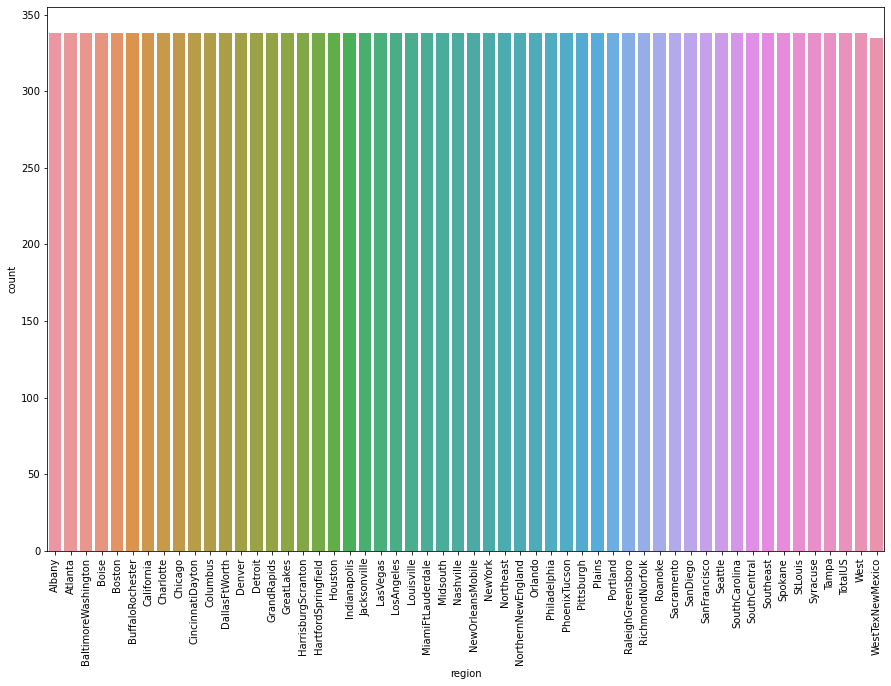

In [24]:
print(df['region'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
plt.show()

#### Bivariant Analysis

<Figure size 1080x720 with 0 Axes>

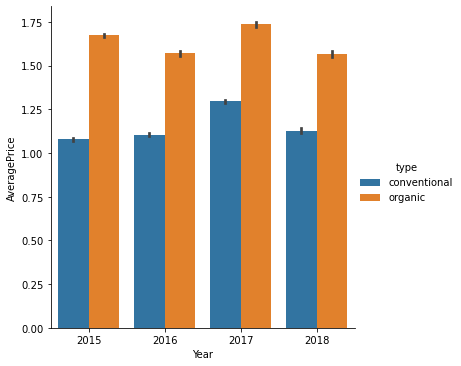

In [25]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year",y="AveragePrice",hue="type", data=df, kind="bar")
# show plot
plt.show()

#### Key observation:
- We can see that how organic Average price more than conventional average price year after year

<Figure size 1080x720 with 0 Axes>

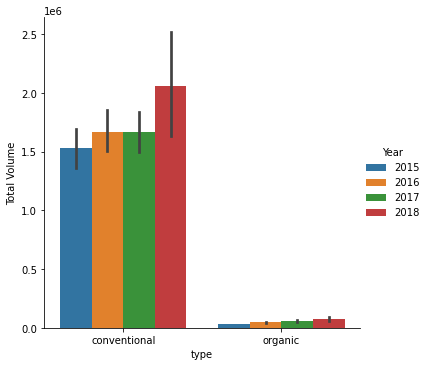

In [26]:
plt.figure(figsize=(15,10))
sns.catplot(x="type",y="Total Volume",hue="Year", data=df, kind="bar")
# show plot
plt.show()

#### Key Observation:

- Total volume of conventional type every time higher than organic type

<Figure size 1080x720 with 0 Axes>

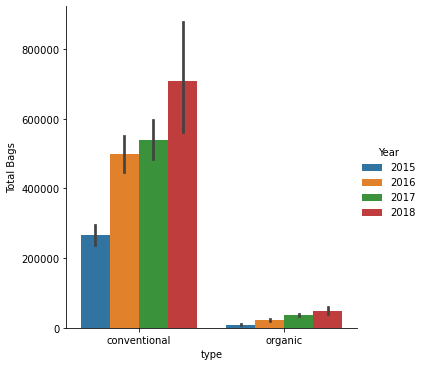

In [27]:
plt.figure(figsize=(15,10))
sns.catplot(x="type",y="Total Bags",hue="Year", data=df, kind="bar")
# show plot
plt.show()

#### Key observation:
- Total Bags of conventional type is always higher than organic type.

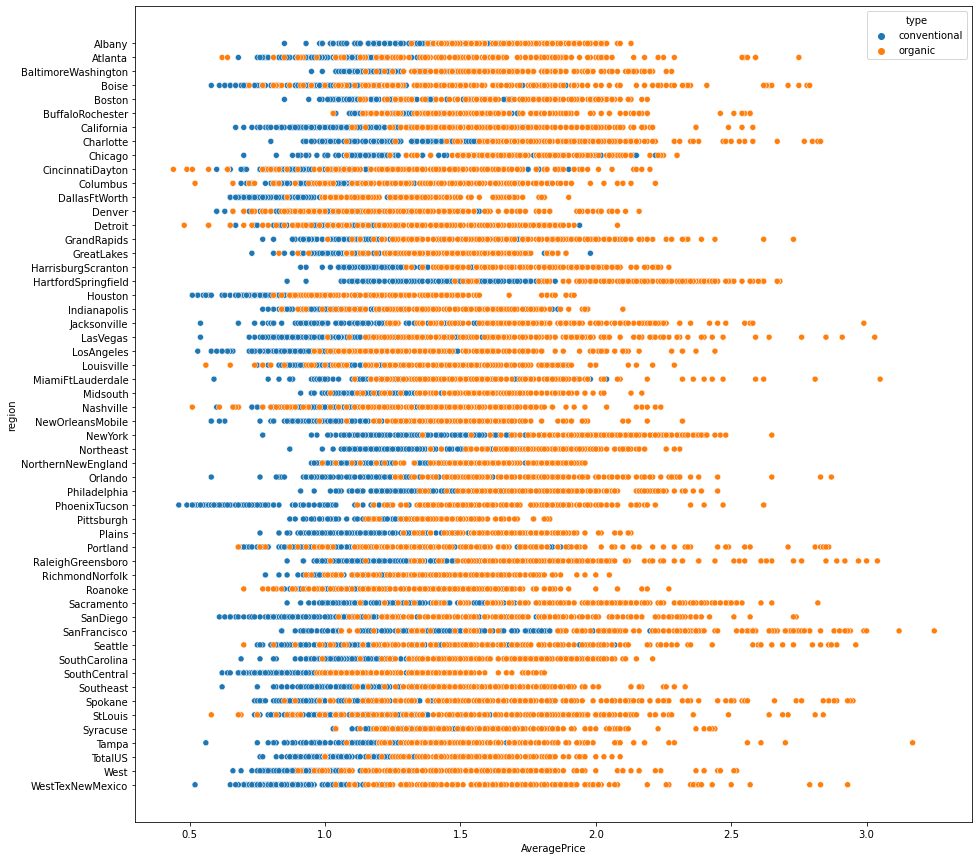

In [28]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="AveragePrice",y="region",hue="type", data=df)
# show plot
plt.show()

#### Key observation:
    
- The Average Price of every Region of organic type is always higher than that of conventional.    

### Removing negative correlated column

In [29]:
df.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,conventional,Albany,2015,12,27
1,1.35,54876.98,9505.56,conventional,Albany,2015,12,20
2,0.93,118220.22,8145.35,conventional,Albany,2015,12,13
3,1.08,78992.15,5811.16,conventional,Albany,2015,12,6
4,1.28,51039.60,6183.95,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,9264.84,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,9394.11,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,10969.54,organic,WestTexNewMexico,2018,1,14


#### Encoding

In [30]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [31]:
oe=OrdinalEncoder()
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


### Removing outlier from Data

In [32]:
z=np.abs(zscore(df))
z

array([[0.18868864, 0.22771641, 0.23417028, ..., 1.22128204, 1.64763162,
        1.29185687],
       [0.13901962, 0.23042664, 0.23335029, ..., 1.22128204, 1.64763162,
        0.49423066],
       [1.18206895, 0.21208462, 0.23472951, ..., 1.22128204, 1.64763162,
        0.30339555],
       ...,
       [1.15237477, 0.24233073, 0.2334633 , ..., 1.97050371, 1.46495942,
        0.60817726],
       [1.30138182, 0.24162464, 0.23186585, ..., 1.97050371, 1.46495942,
        0.18944895],
       [0.53151208, 0.24125273, 0.23080663, ..., 1.97050371, 1.46495942,
        0.98707516]])

In [33]:
threashold=3
print(np.where(z>3))

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
        2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
        2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
        2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
        2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
        2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
        2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
        2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
        2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
        2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
        2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
        2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
        5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
        5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
        5471,  5471

In [34]:
df_new=df[(z<3).all(axis=1)]

In [35]:
df.shape

(18249, 8)

In [36]:
# Checking shape of new dataset
df_new.shape

(17931, 8)

In [37]:
# Data loss

loss_percent=(18249-17931)/18249*100
loss_percent

1.7425612362321221

### Splitting Data into Two parts namely X and Y

In [38]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']
x

,Total Volume,Total Bags,type,region,Year,month,day
0,64236.62,8696.87,0.0,0.0,2015,12,27
1,54876.98,9505.56,0.0,0.0,2015,12,20
2,118220.22,8145.35,0.0,0.0,2015,12,13
3,78992.15,5811.16,0.0,0.0,2015,12,6
4,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...
18244,17074.83,13498.67,1.0,53.0,2018,2,4
18245,13888.04,9264.84,1.0,53.0,2018,1,28
18246,13766.76,9394.11,1.0,53.0,2018,1,21
18247,16205.22,10969.54,1.0,53.0,2018,1,14


In [39]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

### Transforming Data to Remove Skewness:

In [40]:
from sklearn.preprocessing import power_transform

In [41]:
df_x = power_transform(x)
df_x = pd.DataFrame(df_x)
x=df_x

In [42]:
x

,0,1,2,3,4,5,6
0,-0.086605,-0.524004,-0.999836,-2.011552,-1.221895,1.494347,1.229285
1,-0.155746,-0.485890,-0.999836,-2.011552,-1.221895,1.494347,0.541005
2,0.179327,-0.552018,-0.999836,-2.011552,-1.221895,1.494347,-0.215570
3,0.003876,-0.695449,-0.999836,-2.011552,-1.221895,1.494347,-1.091311
4,-0.187640,-0.669157,-0.999836,-2.011552,-1.221895,1.278438,1.416727
...,...,...,...,...,...,...,...
18244,-0.674587,-0.334466,1.000164,1.543838,1.968548,-1.220706,-1.382073
18245,-0.767550,-0.496897,1.000164,1.543838,1.968548,-1.642047,1.323455
18246,-0.771505,-0.490952,1.000164,1.543838,1.968548,-1.642047,0.642842
18247,-0.698077,-0.424252,1.000164,1.543838,1.968548,-1.642047,-0.101959


### Feature Scaling

In [43]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-0.08660524, -0.52400415, -0.99983562, ..., -1.22187884,
         1.49434741,  1.22928497],
       [-0.15574567, -0.48589   , -0.99983562, ..., -1.22187884,
         1.49434741,  0.54100493],
       [ 0.17932662, -0.55201765, -0.99983562, ..., -1.22187884,
         1.49434741, -0.21556953],
       ...,
       [-0.77150535, -0.49095205,  1.00016441, ...,  1.96856389,
        -1.64204669,  0.64284151],
       [-0.69807719, -0.42425214,  1.00016441, ...,  1.96856389,
        -1.64204669, -0.10195902],
       [-0.66380937, -0.38496113,  1.00016441, ...,  1.96856389,
        -1.64204669, -0.95485351]])

## Splitting the DataFrame:
#### Random State

In [45]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5092453476068561 on Random State 79


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=672)

## Linear Regression

In [47]:
def reg(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=672)
    
    #model fitting
    model.fit(x_train,y_train)
    
    #predicting the model
    pred=model.predict(x_test)
    
    
    #Mean squared error
    print('mean square error',mean_squared_error(pred,y_test))
    
    #R2_score
    r2=r2_score(pred,y_test,multioutput="variance_weighted")*100
    print('r2_score',r2)
    
    #cv score
    cv_score=cross_val_score(model,x,y,cv=5).mean()*100
    print('cv score ',cv_score)
    #final score 
    result=r2-cv_score
    print('final score =',result)

In [48]:
model=LinearRegression()
reg(model,x,y)

mean square error 0.0830416573418794
r2_score -6.51033802911809
cv score  12.364140570369171
final score = -18.87447859948726


In [49]:
#Random forest regressor
model=RandomForestRegressor()
reg(model,x,y)

mean square error 0.019278801278538805
r2_score 85.56512334863154
cv score  5.429001802034039
final score = 80.13612154659751


In [50]:
#AdaBoostRegressor
model=AdaBoostRegressor()
reg(model,x,y)

mean square error 0.07624458424352548
r2_score 10.130669995245311
cv score  -4.7837366304165725
final score = 14.914406625661883


In [51]:
#support vector Regressor
model=SVR()
reg(model,x,y)

mean square error 0.05800269183541911
r2_score 41.945900037275564
cv score  -16.607089669653288
final score = 58.552989706928855


In [52]:
#DecisionTreeRegressor
model=DecisionTreeRegressor()
reg(model,x,y)

mean square error 0.04051324200913242
r2_score 75.51683321019198
cv score  -31.501213502144036
final score = 107.01804671233602


In [53]:
#RidgeRegressor
model=Ridge(alpha=1)
reg(model,x,y)

mean square error 0.08304168600613081
r2_score -6.536877340494107
cv score  12.369315808833832
final score = -18.90619314932794


In [54]:
#LassoRegressor
model=Lasso(alpha=1)
reg(model,x,y)

mean square error 0.16615547948329176
r2_score -8.425083731928162e+31
cv score  -120.53134266962336
final score = -8.425083731928162e+31


In [55]:
#XGBRegressor
model=XGBRegressor()
reg(model,x,y)

mean square error 0.017882657328199006
r2_score 87.42141267275471
cv score  35.971247154812225
final score = 51.45016551794249


### Hyper Parameter Tuning

In [56]:
#XGBRegressor
fmod_param={'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [57]:
GSCV=GridSearchCV(XGBRegressor(),fmod_param,cv=5)

In [58]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [59]:
GSCV.best_score_

0.7531881785204841

In [60]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -2}

Here gridsearchcv has provided us best detail of our best model

In [61]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 77.78217141122377


Finally done hyper parameter tuning with best machine learning model and having r2 value .

## Model Saving:

In [63]:
import joblib
filename='final_model-02'
joblib.dump(Final_Model,filename)

['final_model-02']

In [64]:
job=joblib.load("final_model-02")
job

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=2.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200,
             n_jobs=-2, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

Finally saving best regression model with the help of joblib library